## Laboratorio Redes Neuronales

In [1]:
!pip install tensorflow
!pip install keras

import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
datos = pd.DataFrame(data.data,columns = data.feature_names)
ys = pd.DataFrame(data.target,columns = ['Tipo_Cancer'])

In [4]:
datos['tipoCancer'] = ys

In [5]:
datos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tipoCancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
n_test = int(math.ceil(len(datos) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(datos))), n_test)
train_ixs = [ix for ix in range(len(datos)) if ix not in test_ixs]
train = datos.iloc[train_ixs, :]
test = datos.iloc[test_ixs, :]
print(len(train))
print(len(test))

398
171


In [7]:
data = datos
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(datos.drop('tipoCancer',axis=1),ys,test_size=0.3,random_state=123)

In [8]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [9]:
y_train.shape,y_test.shape

((398, 1), (171, 1))

#### En general, deberemos normalizar los datos. Esto para que los efectos esten en los pesos y no en los valores que toman las variables


In [10]:
from sklearn.preprocessing import normalize

features = X_train.columns
X_train = normalize(X_train)
X_test = normalize(X_test)


In [11]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
                      # no lo hemos visto, ya viene en el curso
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update



In [12]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

In [13]:
# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.6657 - accuracy: 0.6382
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6382
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.6382
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6382
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.6382
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6382
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.6407
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7085
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7312
Epoch 10/10
6/6 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7778
Training accuracy: 0.

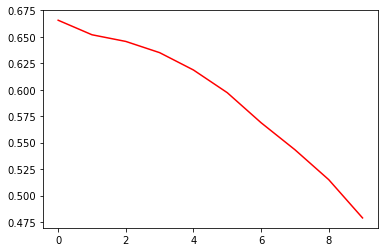

In [14]:
# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### RUN IT AGAIN! ###

que pasaria si agregaramos capas ocultas?

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6382
Epoch 2/10
25/25 [==============================] - 0s 988us/step - loss: 0.6383 - accuracy: 0.6382
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.6382
Epoch 4/10
25/25 [==============================] - 0s 981us/step - loss: 0.5325 - accuracy: 0.7085
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8518
Epoch 6/10
25/25 [==============================] - 0s 1000us/step - loss: 0.3282 - accuracy: 0.8945
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.9070
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9020
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8945
Epoch 10/10
6/6 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9064
Training accur

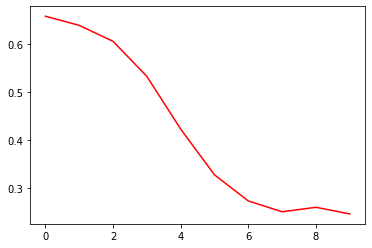

In [15]:
hidden_units = 10 ## capas ocultas iniciales  

# create a seModeloquential model
model = models.Sequential()

# Primera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# segunda capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# final de la red, outputs
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### RUN IT AGAIN! ###

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6382
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6382
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6382
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.6382
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.6784
Epoch 6/10
25/25 [==============================] - 0s 1000us/step - loss: 0.5441 - accuracy: 0.6809
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.7563
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8367
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8945
Epoch 10/10
6/6 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.9006
Training accuracy:

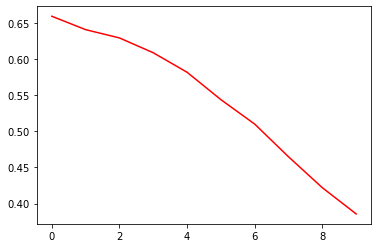

In [16]:
hidden_units = 20 ## capas ocultas iniciales  

# create a seModeloquential model
model = models.Sequential()

# Primera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# final de la red, outputs
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### RUN IT AGAIN! ###